## Process spike triggered LFP and other data


In [2]:
# the following two lines indicate that external functions are auto-reloaded as soon as they change. 
%load_ext autoreload
%autoreload 2
# Print statements 
from __future__ import print_function # Python 2.x

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# General stuff:
import sys
import argparse
import os
import json
import numpy as np
import math
import psycopg2
import cPickle
import numpy as np
import pandas as pd
from datetime import date
from tqdm import tqdm_notebook

# Plotting:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib as mpl
%matplotlib inline

# External functions from subfolder /database_helpers. 
# as soon as you change something in there and press save, it will auto reload on next execution.
from database_helpers.psql_start import *
from database_helpers.create_tables import *
from database_helpers.write2tables import *
from postgres_analysis_helpers.general import *
from postgres_analysis_helpers.get_data import *
from postgres_analysis_helpers.circstat_functions import *
# register pickle type to retrieve binary data from database
psycopg2.extensions.register_type(psycopg2.extensions.new_type(psycopg2.BINARY.values, 'BINARY-PICKLE', cast_pickle))

Loaded analysis helpers: General
Loaded postgres_analysis_helpers -> general
Loaded postgres_analysis_helpers -> get_data
Loaded postgres_analysis_helpers -> circstat_functions


In [4]:
db_status = test_connect()
if db_status == False:
    print('Grrr... no database connection could be established.')
else:
    print('Yippiyeah! Database connection is established!')

Connecting to the PostgreSQL database...
Yippiyeah! Database connection is established!


In [45]:
base_dataframe = pd.DataFrame() # create empty dataframe or feed in a base dataframe from before! *

In [46]:
psql = psql_neuroballs(base_dataframe)

70 animals across 6 experimenters found!
Total # of 9001 sessions (unique clusters: 14446)


In [47]:
psql.retrieve_data()

Retrieving data ... (Empty dataframe) ...
99 entries retrieved.


In [48]:
base_dataframe = psql.data()

In [51]:
base_dataframe[base_dataframe.rayleigh_p > 0.01]

,tetrode_no,animal_id,n_drive_user,session_ts,cluster_no,session_name,rayleigh_p
0,5,72878,horsto,2017-04-10 11:18:43,17,10042017s1,0.040390
1,7,72878,horsto,2017-04-10 11:18:43,15,10042017s1,0.024815
2,7,72878,horsto,2017-04-10 11:18:43,28,10042017s1,0.010944
5,8,71710,horsto,2017-04-10 11:46:38,32,10042017s1,0.011978
8,6,72878,horsto,2017-04-18 13:10:56,52,18042017s1,0.025151
11,8,72878,horsto,2017-04-18 13:10:56,58,18042017s1,0.047084
12,8,72878,horsto,2017-04-18 13:10:56,60,18042017s1,0.031571
17,7,71710,horsto,2017-04-18 13:53:04,6,18042017s1,0.021047
18,7,72878,horsto,2017-04-11 10:41:29,22,11042017s1,0.043895
20,8,71710,horsto,2017-04-18 13:53:04,19,18042017s1,0.019033


### External functions 

In [11]:
from analysis_helpers.lfp import *

In [34]:
theta_range

[None, None]

In [35]:
df

,tetrode_no,animal_id,n_drive_user,session_ts,cluster_no,session_name,spiket_tracking_session,lfp_session,theta_range_max,theta_range_min
0,8,73219,horsto,2017-06-27 10:22:31,2,27062017s1(4th_floor),time speed speed_filtered c...,time eeg0 eeg1 eeg2 eeg3 eeg_...,None,None


In [39]:
if not theta_range[0]:
    print('DAMN')

DAMN


0
Rayleigh p for spike phase coupling >= 0.05. Skipping calculations.
1
Rayleigh p for spike phase coupling >= 0.05. Skipping calculations.
2
Rayleigh p for spike phase coupling >= 0.05. Skipping calculations.
3
4
Rayleigh p for spike phase coupling >= 0.05. Skipping calculations.
5
Rayleigh p for spike phase coupling >= 0.05. Skipping calculations.
6
Rayleigh p for spike phase coupling >= 0.05. Skipping calculations.
7
Rayleigh p for spike phase coupling >= 0.05. Skipping calculations.
8
Rayleigh p for spike phase coupling >= 0.05. Skipping calculations.
9
Rayleigh p for spike phase coupling >= 0.05. Skipping calculations.
10
Rayleigh p for spike phase coupling >= 0.05. Skipping calculations.
11
12
Rayleigh p for spike phase coupling >= 0.05. Skipping calculations.
13
Rayleigh p for spike phase coupling >= 0.05. Skipping calculations.
14
Rayleigh p for spike phase coupling >= 0.05. Skipping calculations.
15
Rayleigh p for spike phase coupling >= 0.05. Skipping calculations.
16
Rayleig

AttributeError: 'NoneType' object has no attribute 'eeg_mean'

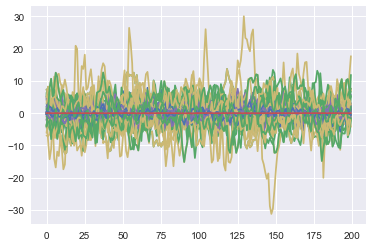

In [40]:
# To work with the cursor data:
conn,cur,status,columns = psql.cursor()

for no,entry in enumerate(cur):
    df = pd.DataFrame([x for x in entry]).T
    df.columns = [columns]
    print(no)
    # work with the data here...
    sample_rate_eeg = 250
    theta_range = [df.theta_range_min.values[0],df.theta_range_max.values[0]]
    if not theta_range[0]: continue
    bins_angle_center,hist_angle_smooth,phase_stats,rayleigh_p,spike_trig_LFP_df = stats_phase_tuning(df.lfp_session[0],df.spiket_tracking_session[0],sample_rate_eeg,theta_range)
    plt.plot(spike_trig_LFP_df)

plt.show()



In [44]:
rayleigh_p

0.83373795455568867

In [ ]:
if status:
    conn.close()
    cur.close() 